# ***Data Understanding***

In [ ]:
#Mount the file
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
#Load the dataset
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
#Display first few rows
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
#Display last few rows
print(df.tail())

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


In [ ]:
#Display number of rows and columns
print(df.shape)

(200, 5)


In [ ]:
#Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
# Display summary statistics for selected columns
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe())

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


# ***Data Preprocessing***

In [ ]:
#Encode Gender (0/1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
#Process of StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

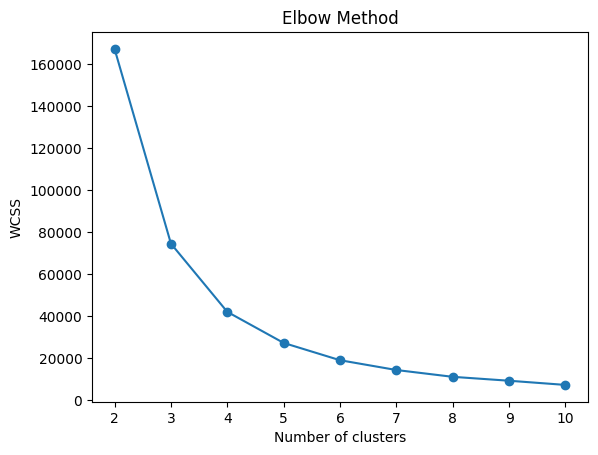

In [ ]:
#Elbow Method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Silhouette Score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

best_score = -1
best_k = 0

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")

    if score > best_score:
        best_score = score
        best_k = k

print(f"\nOptimal number of clusters based on Silhouette Score: {best_k}")

Silhouette Score for k=2: 0.6215
Silhouette Score for k=3: 0.5807
Silhouette Score for k=4: 0.5580
Silhouette Score for k=5: 0.5421
Silhouette Score for k=6: 0.5298
Silhouette Score for k=7: 0.5189
Silhouette Score for k=8: 0.5100
Silhouette Score for k=9: 0.5002
Silhouette Score for k=10: 0.4889

Optimal number of clusters based on Silhouette Score: 2


# ***Model Implementation***

In [ ]:
#Implement KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

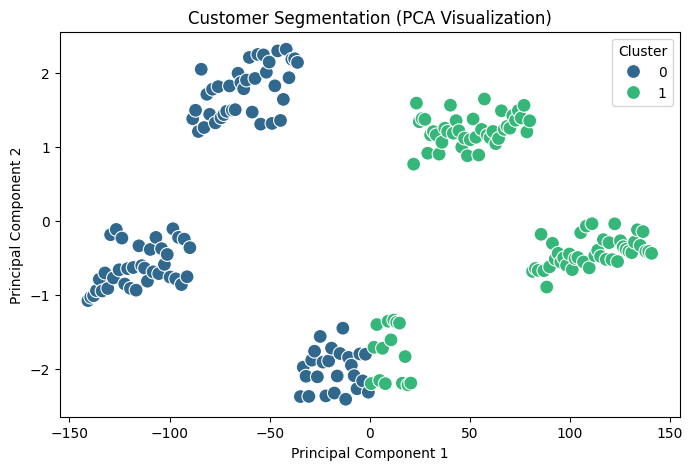

In [ ]:
#Visualing Customer Segments - PCA
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_features = pca.fit_transform(df)

df['PCA1'] = pca_features[:,0]
df['PCA2'] = pca_features[:,1]

plt.figure(figsize=(8,5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segmentation (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# ***Model Evaluation***

In [ ]:
# Get the average profile for each cluster
df.groupby('Cluster')[['Gender', 'Age', 'Annual Income (k$)',
                       'Spending Score (1-100)']].mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.59,0.06459,-0.801558,-0.010482
1,0.53,-0.06459,0.801558,0.010482
